# Prüfen installierter Bibliotheken

In [1]:
import netCDF4
import xarray as xr
from mpl_toolkits.basemap import Basemap
import cartopy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point

# Animationen

In [2]:
from IPython.display import HTML
import matplotlib.animation

In [3]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [4]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.025 * i))
    line.set_data(x, y)
    return (line,)

In [5]:
anim = mpl.animation.FuncAnimation(fig, animate,
                                   init_func=init,
                                   frames=40, interval=50,
                                   blit=True)
anim.save('anim.mp4')
HTML(anim.to_html5_video())

# JIT-Kompilierung mit Numba

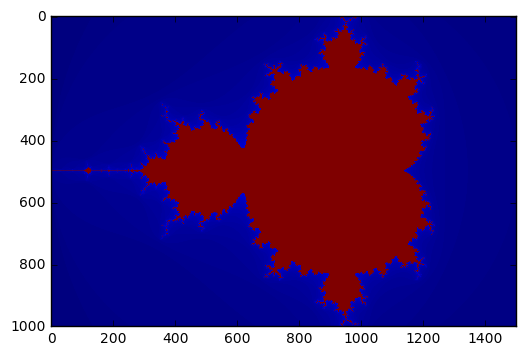

In [6]:
%matplotlib inline
from numba import jit

@jit
def mandel_numba(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return 255

@jit
def create_fractal_numba(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel_numba(real, imag, iters)
            image[y, x] = color

    return image

image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)
create_fractal_numba(-2.0, 1.0, -1.0, 1.0, image, 20)
plt.imshow(image)

# Karten mit Cartopy

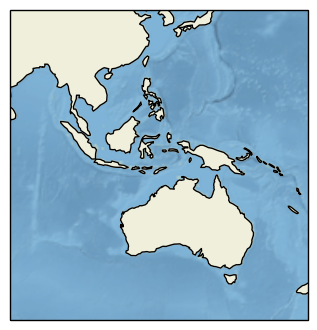

In [7]:
import cartopy.crs as ccrs
import cartopy.feature

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([80, 170, -45, 30])
ax.stock_img()
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.COASTLINE)

# Karten mit Basemap

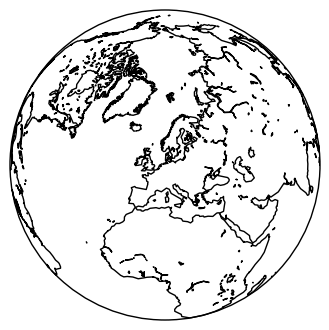

In [8]:
my_map = Basemap(projection='ortho', lat_0=53., lon_0=8.,
                 resolution='c', area_thresh=1000.0)
my_map.drawcoastlines()